<a href="https://colab.research.google.com/github/NidhiChaurasia/LGMVIP-DataScience/blob/main/Stock_Prediction_Using_Linear_Regression_and_DecisionTree_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree is used in practical approaches of supervised learning.It can be used to solve both Regression and Classification tasks.It is a tree-structured classifier with three types of nodes.Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.Decision trees can handle both categorical and numerical data.

In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor #Decision Trees in Machine Learning to Predict Stock Movements.A decision tree algorithm performs a set of recursive actions before it arrives at the end result and when you plot these actions on a screen, the visual looks like a big tree, hence the name 'Decision Tree'.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


# The dataset comprises of Open, High, Low, Close Prices and Volume indicators (OHLCV).

In [3]:
#Store the data into a data frame
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
#Get the number of trading days
df.shape

(2035, 8)

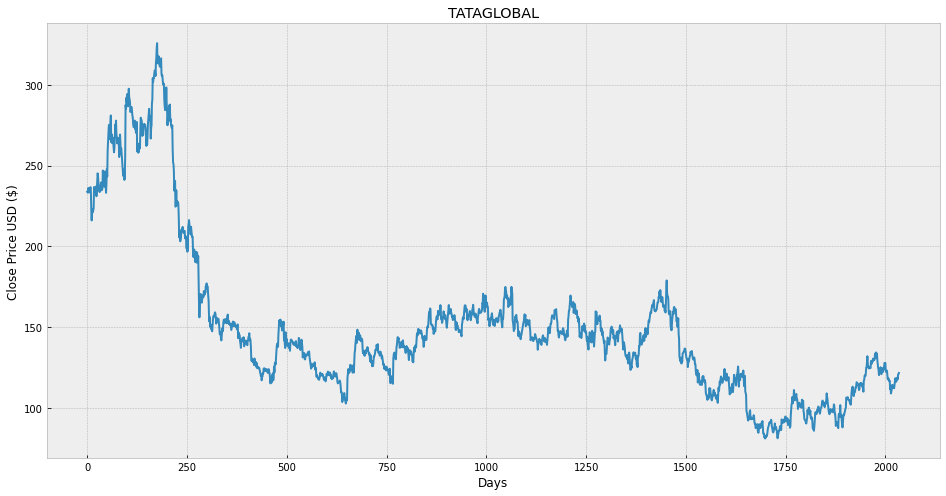

In [5]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('TATAGLOBAL')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [6]:
#Get the close Price
df = df[['Close']]
df.head(4)

,Close
0,233.75
1,233.25
2,234.25
3,236.10


In [7]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2031,117.60,NaN
2032,120.65,NaN
2033,120.90,NaN
2034,121.55,NaN


In [8]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[233.75]
 [233.25]
 [234.25]
 ...
 [117.75]
 [118.15]
 [117.  ]]


In [9]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[240.55 245.15 243.   ... 120.65 120.9  121.55]


In [10]:
#Split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.25)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train , y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train , y_train)

In [12]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[121.5 ],
       [122.85],
       [123.6 ],
       [125.1 ],
       [123.55],
       [120.8 ],
       [122.5 ],
       [124.55],
       [122.65],
       [122.15],
       [123.25],
       [123.9 ],
       [125.95],
       [127.8 ],
       [127.25],
       [127.7 ],
       [123.15],
       [122.15],
       [122.4 ],
       [123.  ],
       [120.5 ],
       [117.6 ],
       [117.75],
       [118.15],
       [117.  ]])

In [13]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[116.45       116.7        111.5        113.05       114.9
  97.83333333 146.2        117.825      109.45       113.9
 112.3        130.4        116.25       114.85       120.8
 118.3        133.05       113.9        116.6        118.25
 118.65       117.6        108.6        115.625      150.9       ]

[121.98044322 123.24894783 123.95367261 125.36312217 123.90669096
 121.3227001  122.92007627 124.846324   123.06102122 122.5912047
 123.62480105 124.23556252 126.16181026 127.90013138 127.38333321
 127.80616808 123.53083774 122.5912047  122.82611296 123.38989279
 121.04081018 118.31587436 118.45681932 118.83267254 117.75209454]


##Let's Visualize the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


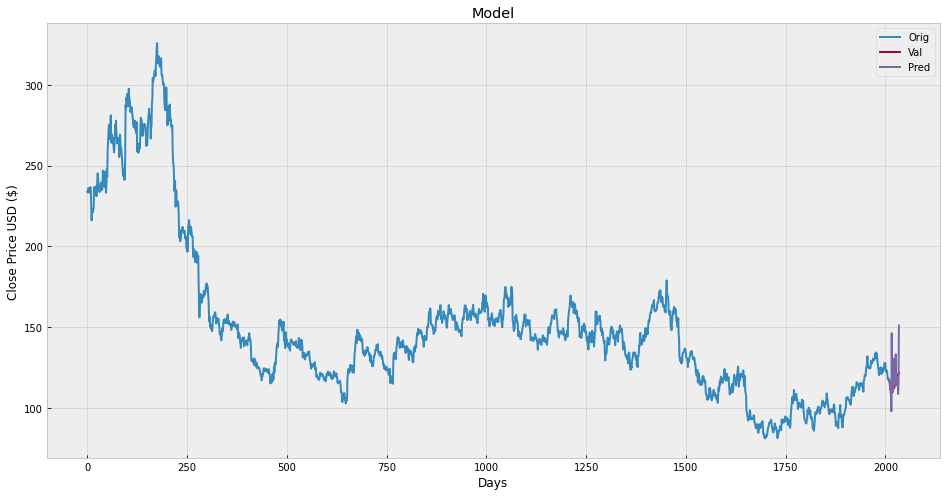

In [16]:
predictions = tree_prediction   #The regression decision trees take ordered values with continuous values.

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


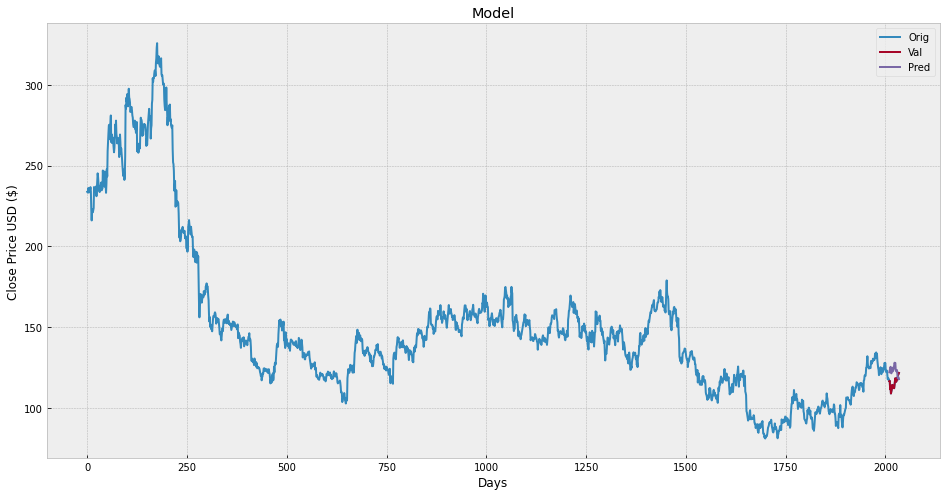

In [18]:
predictions = lr_prediction  #Linear Model for Stock Price Prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()